In [1]:
# installing packages for analysis
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

In [2]:
# using pandas to read csv file
df = pd.read_csv('/content/sample_data/Train.csv')
# this returns the first 5 rows of the dataset to have an overview
df.head(5)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,30921,49,1,2,105,220,1,1,195,1,1.0,1,2,3,1
1,73128,29,1,0,160,180,0,2,198,0,6.0,2,1,0,1
2,45328,46,1,2,115,131,1,2,125,1,2.3,0,0,0,1
3,67372,41,1,2,161,454,1,2,159,1,3.5,2,4,0,1
4,41642,57,1,3,129,277,0,1,80,0,5.6,0,2,0,0


In [3]:
# gets quick info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7087 non-null   int64  
 1   age       7087 non-null   int64  
 2   sex       7087 non-null   int64  
 3   cp        7087 non-null   int64  
 4   trestbps  7087 non-null   int64  
 5   chol      7087 non-null   int64  
 6   fbs       7087 non-null   int64  
 7   restecg   7087 non-null   int64  
 8   thalach   7087 non-null   int64  
 9   exang     7087 non-null   int64  
 10  oldpeak   7087 non-null   float64
 11  slope     7087 non-null   int64  
 12  ca        7087 non-null   int64  
 13  thal      7087 non-null   int64  
 14  target    7087 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 830.6 KB


In [4]:
# data shape
df.shape

(7087, 15)

In [5]:
# quick statistical description
df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000
mean,50520.455341,53.161987,0.498660,1.511923,147.749259,343.852265,0.499365,1.011006,136.083251,0.500494,3.126556,0.995485,2.023705,1.496402,0.811486
std,23091.461196,14.217069,0.500033,1.118239,31.019531,127.795534,0.500035,0.816595,38.022627,0.500035,1.784760,0.817175,1.411018,1.118296,0.391150
min,10019.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30629.000000,41.000000,0.000000,1.000000,121.000000,231.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,0.000000,1.000000
50%,50872.000000,53.000000,0.000000,2.000000,148.000000,344.000000,0.000000,1.000000,136.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,70511.000000,66.000000,1.000000,3.000000,175.000000,453.000000,1.000000,2.000000,169.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,89991.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# checking for missing values
df.isna().sum()

,0
id,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


In [7]:
#checking for duplicates
df.duplicated().sum()

0

# Exploratory Data Analysis

- First, let's explore the relationship between all variables using the heatmap plot.

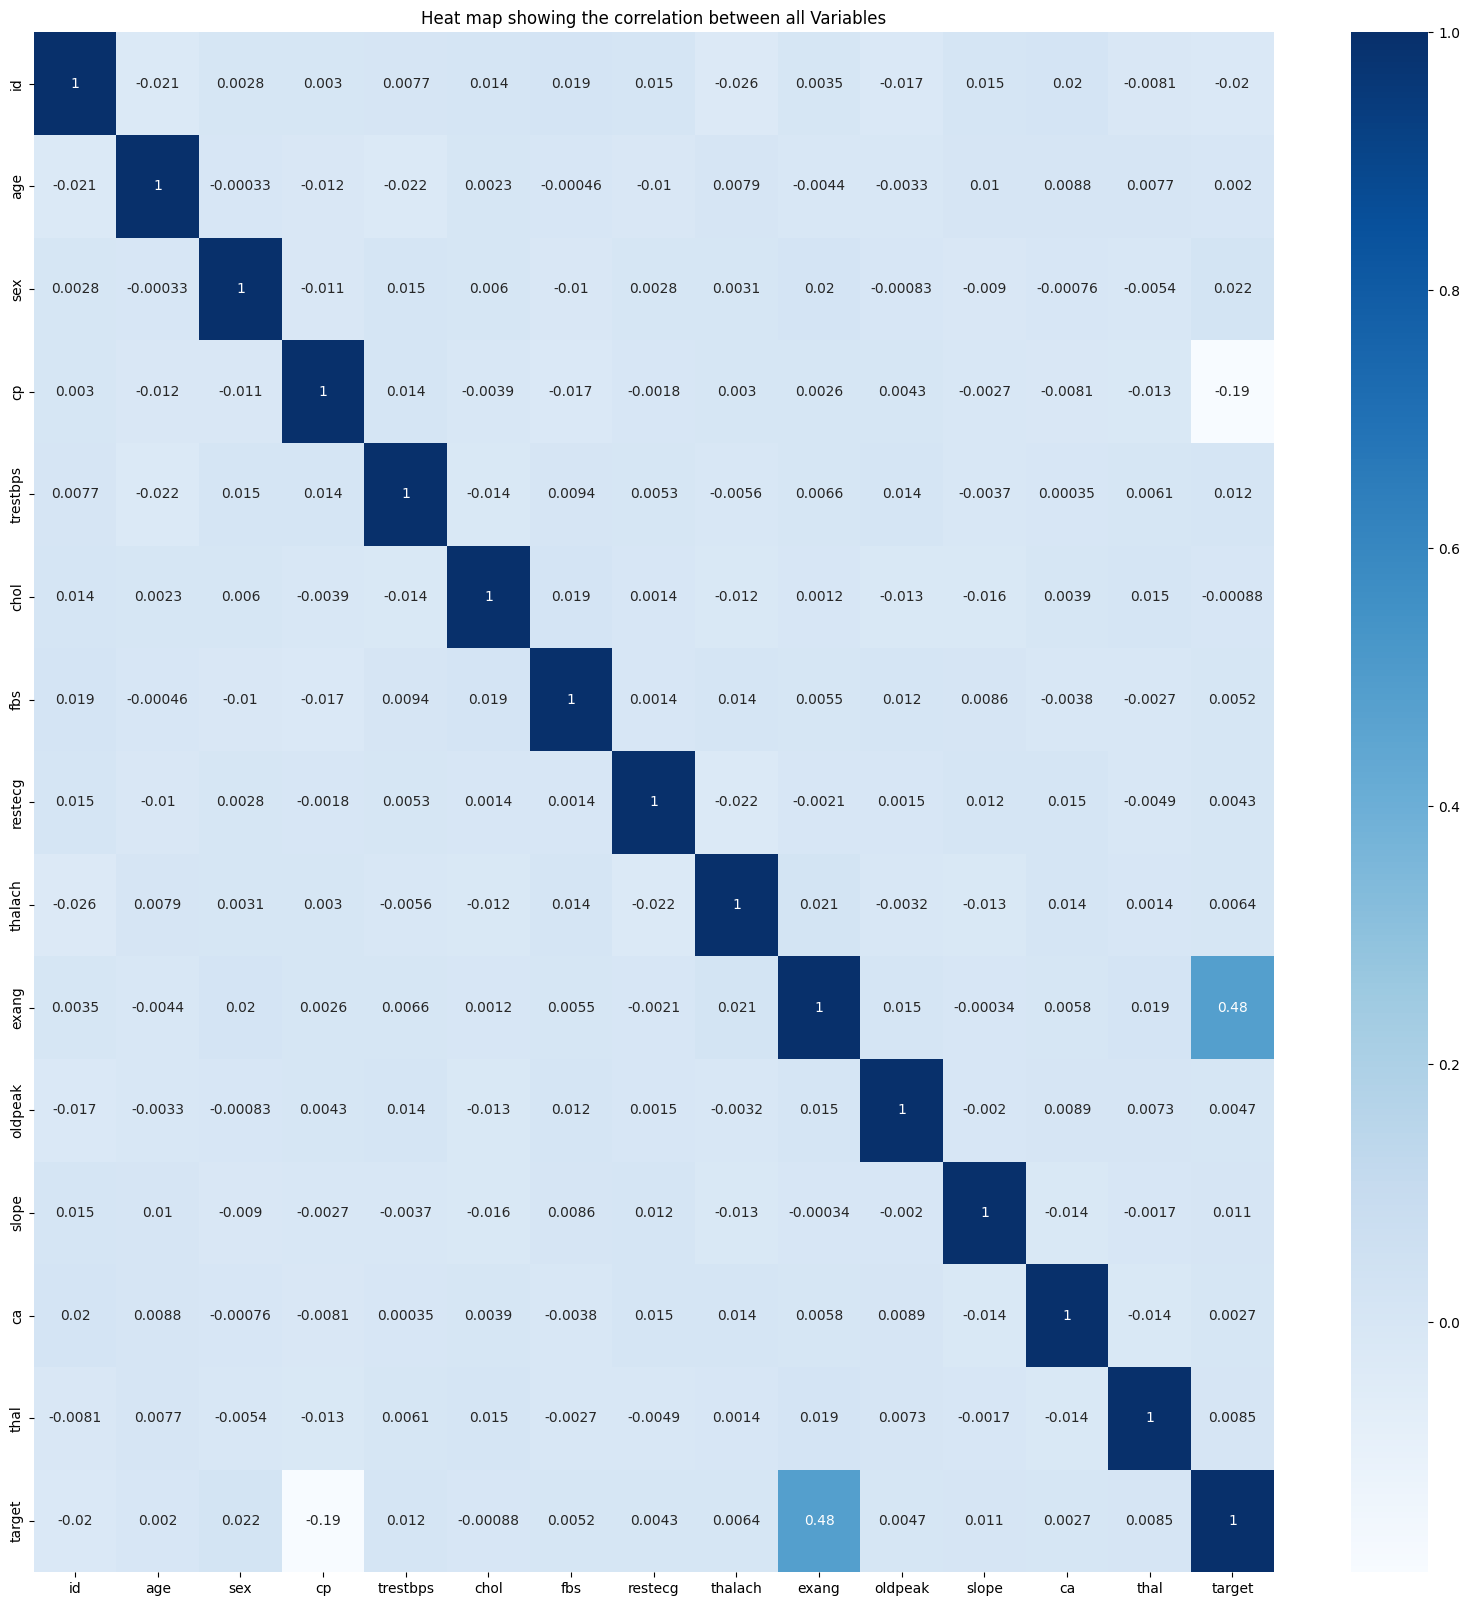

In [8]:
#seaborn plot of the heatmap set to colour blue
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.title('Heat map showing the correlation between all Variables');

- And a quick correlation analysis against the target variable

In [9]:
df.corr()['target'].sort_values(ascending=False)

,target
target,1.000000
exang,0.482459
sex,0.021797
trestbps,0.012341
slope,0.011465
thal,0.008450
thalach,0.006426
fbs,0.005160
oldpeak,0.004746
restecg,0.004288


The only variable showing a good postive correlation to the "target" is the "exang".

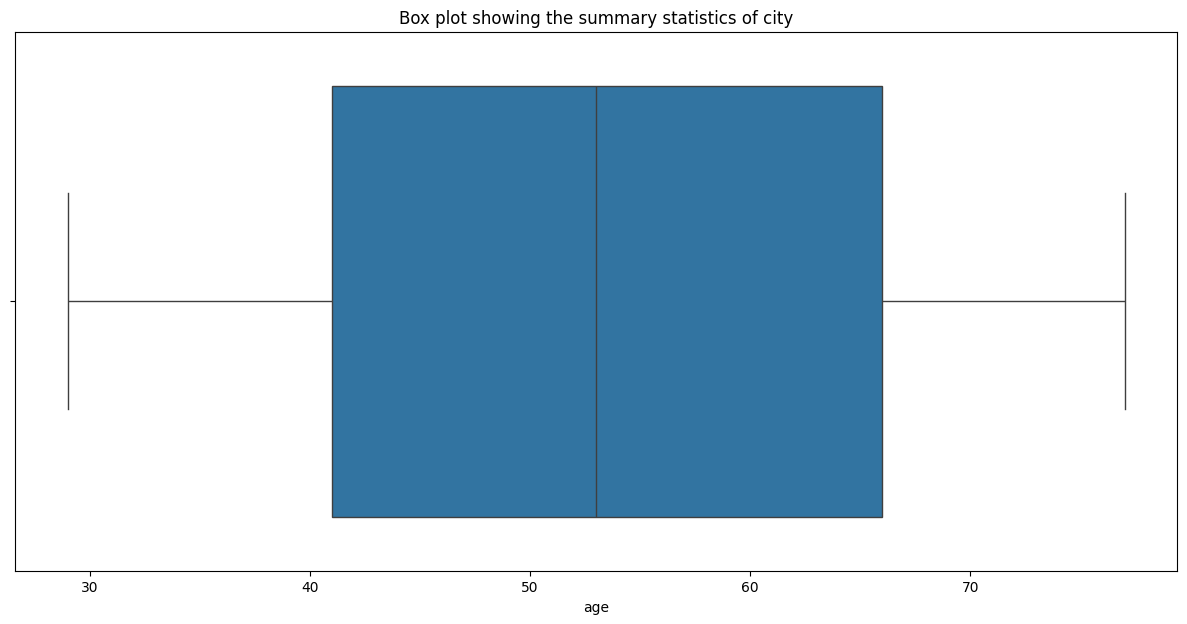

In [10]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'age', data = df)
plt.title('Box plot showing the summary statistics of city');

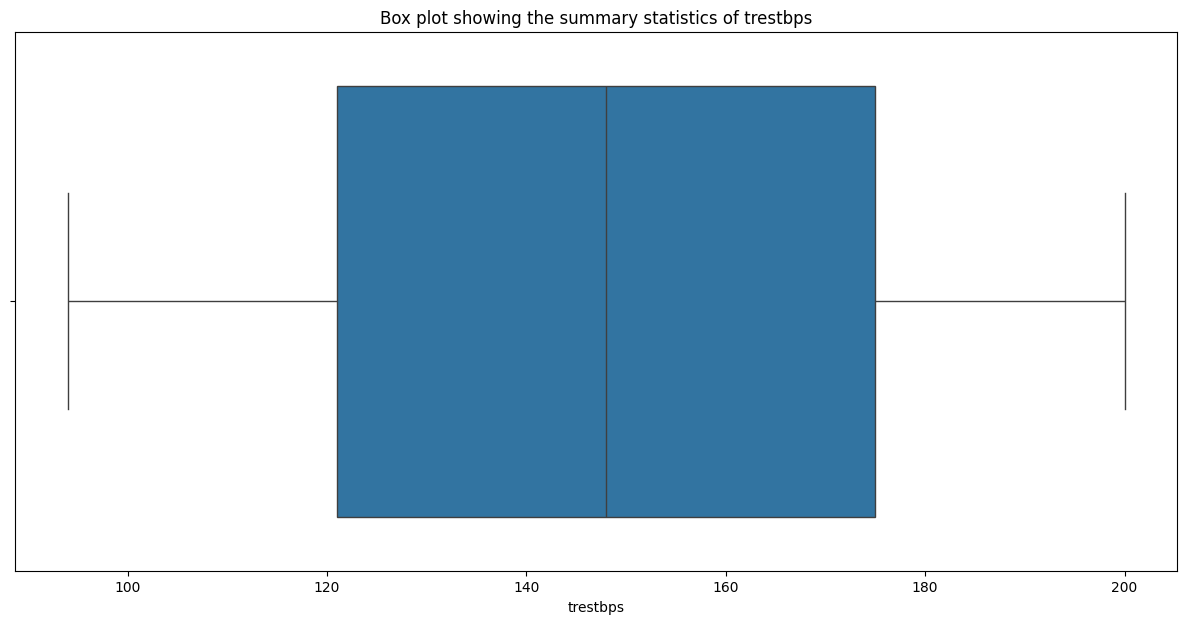

In [11]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'trestbps', data = df)
plt.title('Box plot showing the summary statistics of trestbps');

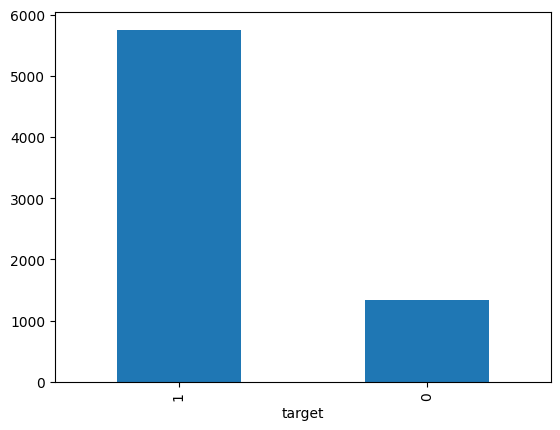

In [12]:
df['target'].value_counts().plot(kind='bar');

# Data Cleaning

- Data appears to be mostly clean.
- No missing values, nulls or duplicated rows.
- No outliers and all categorical datas are already recorded numerically.
- Data is also distributed normally, no need for normalization or standardization.

# Model Building



I will build a couple of models while compare their accuracy scores, before proceeding to use them for predictions on the test dataset.

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

In [14]:
# Loading the train and test datasets
train_data = pd.read_csv('/content/sample_data/Train.csv')
test_data = pd.read_csv('/content/sample_data/Test.csv')

In [15]:
X = train_data.drop(columns=['target'])  # Features (all columns except 'target')
y = train_data['target']  # Target (the column I want to predict)

In [16]:
# Splitting the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier

In [17]:
# Initializing the model
rf_model = RandomForestClassifier(random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Making predictions on the validation set
y_pred_val = rf_model.predict(X_val)

# Evaluating the model's performance
print("RandomForestClassifier Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))


RandomForestClassifier Validation Accuracy: 0.7983074753173484
              precision    recall  f1-score   support

           0       0.42      0.35      0.38       251
           1       0.86      0.89      0.88      1167

    accuracy                           0.80      1418
   macro avg       0.64      0.62      0.63      1418
weighted avg       0.79      0.80      0.79      1418



### Cross-Validation

Using the cross-validation method on the entire training set to figure if the accuracy score improves

In [19]:
# Performing 5-fold cross-validation on the entire training dataset
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Display the cross-validation scores and the average
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.80183357 0.81029619 0.81157375 0.78899083 0.8052223 ]
Average Cross-Validation Accuracy: 0.8035833267804904


There is improvement.

### Tuned RF model

I also decided to tune the Random Forest Classifier model, using randomized search to better optimize the model.

In [20]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Initialize the RandomForest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", random_search.best_params_)

# Get the best accuracy score
print("Best accuracy:", random_search.best_score_)

# Use the best model to make predictions
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_val)

# Calculate accuracy on the validation set
accuracy_rf_tuned = accuracy_score(y_val, y_pred_rf)
print("Tuned Random Forest Accuracy:", accuracy_rf_tuned)

'# Define the parameter grid\nparam_dist = {\n    \'n_estimators\': [100, 200, 300, 400, 500],\n    \'max_depth\': [10, 20, 30, 40, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\'],\n    \'bootstrap\': [True, False]\n}\n\n# Initialize the RandomForest model\nrf = RandomForestClassifier(random_state=42)\n\n# Initialize RandomizedSearchCV\nrandom_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,\n                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)\n\n# Fit RandomizedSearchCV\nrandom_search.fit(X_train, y_train)\n\n# Get the best parameters\nprint("Best parameters:", random_search.best_params_)\n\n# Get the best accuracy score\nprint("Best accuracy:", random_search.best_score_)\n\n# Use the best model to make predictions\nbest_rf = random_search.best_estimator_\ny_pred_rf = best_rf.predict(X_val)\n\n# Calculate accuracy on the validation set\naccu

In [21]:
# Using the best parameters found from RandomizedSearchCV
rf_tuned = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)


rf_tuned.fit(X_train, y_train)


y_pred_tuned_rf = rf_tuned.predict(X_val)


accuracy_rf_tuned = accuracy_score(y_val, y_pred_tuned_rf)
print("Tuned Random Forest Accuracy:", accuracy_rf_tuned)


Tuned Random Forest Accuracy: 0.814527503526093


The tuned model gives a higher accuracy than the original model.

In [22]:
rf_tuned.fit(X, y)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)

In [23]:
# Making predictions on the test dataset
test_predictions = rf_tuned.predict(test_data)

In [24]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})

# Saving the submission file in a csv format
submission.to_csv('submission_rf_tuned.csv', index=False)

### RF Feature selection

Still in the bid of trying to improve performance, I decided to drop unwanted or unimportance features to see if there would be improvements.

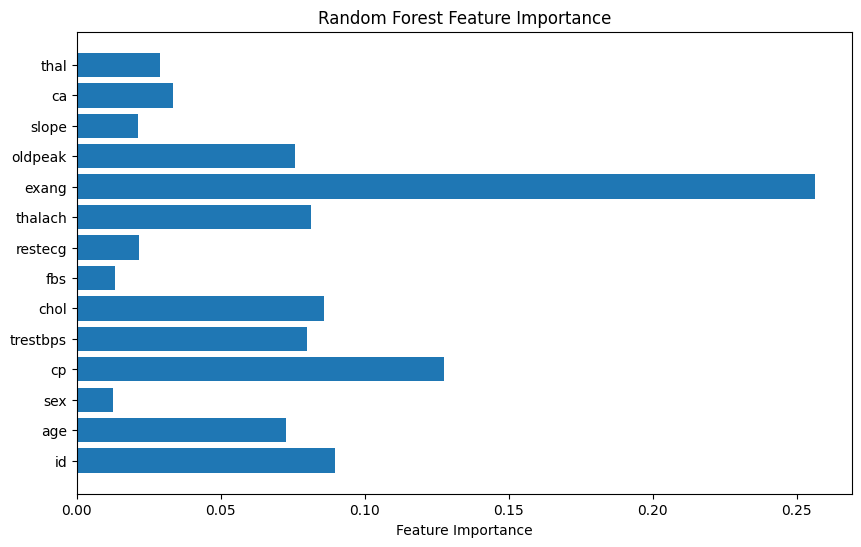

In [25]:
# Fitting the model and getting the important features
rf_tuned.fit(X_train, y_train)
importances = rf_tuned.feature_importances_
feature_names = X_train.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

Based of this graph, I believe 8 features appears the most important. Therefore, using recursive feature elimination method, I would select the top 8 features, and retrain to see if there would be improvement in accuracy.

In [26]:
# Initializing the RFE with Random Forest and select the top '8' features
rfe = RFE(estimator=rf_tuned, n_features_to_select=8)
rfe.fit(X_train, y_train)

# Getting the ranking of the features
rfe_ranking = rfe.ranking_

# Training a new model using only the selected features
X_train_rfe = X_train.iloc[:, rfe.support_]
X_val_rfe = X_val.iloc[:, rfe.support_]

rf_rfe = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True)
rf_rfe.fit(X_train_rfe, y_train)

# Predicting and evaluate the performance on the validation set
y_pred_rfe = rf_rfe.predict(X_val_rfe)
rfe_accuracy = accuracy_score(y_val, y_pred_rfe)
print(f"Accuracy after Feature Selection: {rfe_accuracy}")

Accuracy after Feature Selection: 0.8152327221438646


There is improvement, but not so significant.

In [27]:
rf_rfe.fit(X, y)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)

In [28]:
test_predictions = rf_rfe.predict(test_data)

In [29]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})


submission.to_csv('submission_rf_rfe.csv', index=False)

## XGBoost

Checking if the XGBoost model gives a higher accuracy score than random forest.

In [30]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [31]:
y_pred_val = xgb_model.predict(X_val)


accuracy = accuracy_score(y_val, y_pred_val)
print(" XGBoost Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred_val))

 XGBoost Validation Accuracy: 0.811706629055007
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       251
           1       0.88      0.89      0.89      1167

    accuracy                           0.81      1418
   macro avg       0.67      0.67      0.67      1418
weighted avg       0.81      0.81      0.81      1418



The accuracy score is lower than that of the tuned RF model.

### Hyperparameter Tuning of the XGBoost model

In [32]:
# Defining the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# Setting up the RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   scoring='accuracy', cv=5, n_iter=50, verbose=1, random_state=42, n_jobs=-1)

# Fitting to the training data
random_search.fit(X_train, y_train)

# Getting the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best accuracy: {random_search.best_score_}")

# Using the best parameters to fit the final model
xgb_new = random_search.best_estimator_
xgb_new.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}
Best accuracy: 0.8140772807439474


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [33]:
xgb_new.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [34]:
test_predictions = xgb_new.predict(test_data)

In [35]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})


submission.to_csv('submission_xgb_new.csv', index=False)

## Logistic Regression

In [36]:
# Initializing the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)


log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_val)


accuracy_log = accuracy_score(y_val, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)

Logistic Regression Accuracy: 0.8159379407616361


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
log_model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [38]:
test_predictions = log_model.predict(test_data)

In [39]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})


submission.to_csv('submission_log.csv', index=False)

Although, the logistics model accuracy score is slightly higher than the tuned RF model, it does not do a better job at generalizing on unseen data unlike the tuned RF model.

## SVM

In [40]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_svm = svm_model.predict(X_val)

# Calculate accuracy
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.8229901269393513


Even with a higher accuracy score, the SVM model also faces the same issue with generalization on unseen data just like the logistic regression model.

### Tuned-SVM

In [ ]:
"""# Defining parameter grid for SVM
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto'],
              'degree': [2, 3, 4]}

# Initialize SVM model
svm_model = SVC()

# Performing Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Train SVM with best parameters and evaluate on the test set
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_val)
accuracy_svm_tuned = accuracy_score(y_val, y_pred_svm)
print("Tuned SVM Accuracy:", accuracy_svm_tuned)"""


In [42]:
svm_model.fit(X, y)

SVC()

In [43]:
test_predictions = svm_model.predict(test_data)

In [44]:
# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})

# Save the submission file
submission.to_csv('submission_svm.csv', index=False)

## KNN

Building the KNN model, to check for accuracy score also.

In [46]:

knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_val)


accuracy_knn = accuracy_score(y_val, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.7912552891396333


In [47]:
knn_model.fit(X, y)

KNeighborsClassifier()

In [48]:
test_predictions = knn_model.predict(test_data)

In [49]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})

# Save the submission file
submission.to_csv('submission_knn.csv', index=False)

The KNN accuracy score is not so great compared to previous models seen.

## Gradient Boosting

In [50]:

gbc_model = GradientBoostingClassifier(random_state=42)


gbc_model.fit(X_train, y_train)


y_pred_gbc = gbc_model.predict(X_val)


accuracy_gbc = accuracy_score(y_val, y_pred_gbc)
print("Gradient Boosting Classifier Accuracy:", accuracy_gbc)


Gradient Boosting Classifier Accuracy: 0.807475317348378


In [51]:
gbc_model.fit(X, y)

GradientBoostingClassifier(random_state=42)

In [52]:
test_predictions = gbc_model.predict(test_data)

In [53]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})

# Save the submission file
submission.to_csv('submission_gbc.csv', index=False)

The Gradient Boosting model accuracy score is also not so great compared to other models seen before now.

## Model Stacking: RF Model and XGBoost

Since the RF model and XGBoost appears to do a good job at generalizing, I would explore options with them.

- The first option would be to perform model stacking which will combine the strength of the RF model and the XGBoost, using logistic regression as the meta-model to improve performance.

In [54]:
# Base models
rf_rfe
xgb_model

# Stacking the base models with Logistic Regression as the meta-model
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_rfe),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=False  # If True, features will be concatenated with predictions
)

# Train the stacked model
stacking_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacking_model.predict(X_val)
stacking_accuracy = accuracy_score(y_val, y_pred_stack)
print(f"Stacking Model (tuned Random Forest + XGBoost with LogisticRegression as meta-model) Accuracy: {stacking_accuracy}")

Stacking Model (tuned Random Forest + XGBoost with LogisticRegression as meta-model) Accuracy: 0.8208744710860366


In [55]:
stacking_model.fit(X, y)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [56]:
test_predictions = stacking_model.predict(test_data)

In [57]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})

submission.to_csv('submission_stacked_model.csv', index = False)

The stacked model's accuracy score appears to do better.

- The second option would be to make the meta-model in the stacked model, XGBoost instead of Logistic regression.

In [58]:
#base models
rf_rfe
xgb_model

# Using XGBoost as the meta-model
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_rfe),
        ('xgb', xgb_model)
    ],
    final_estimator=XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1),
    passthrough=False
)


stacking_model.fit(X_train, y_train)

# Predicting and evaluating
y_pred_stack = stacking_model.predict(X_val)
stacking_accuracy = accuracy_score(y_val, y_pred_stack)
print(f"Stacking Model (tuned Random Forest + XGBoost with XGBoost as meta-model) Accuracy: {stacking_accuracy}")

Stacking Model (tuned Random Forest + XGBoost with XGBoost as meta-model) Accuracy: 0.8293370944992948


There is a significant improvement on the accuracy score with this new stacked model.

In [59]:
stacking_model.fit(X, y)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=200, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [60]:
stacking_model.predict(test_data)

array([1, 1, 1, ..., 1, 1, 0])

In [61]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})

submission.to_csv('submission_stacked_model_new.csv', index = False)

- Another option would be to tune the hyperparameters of each individual models and in turn improve the stacked model.

In [62]:
#base models
rf_rfe # tuned RF model
xgb_new # tuned XGBoost model

# Using XGBoost as the meta-model
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_rfe),
        ('xgb', xgb_new)
    ],
    final_estimator=XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1),
    passthrough=False
)


stacking_model.fit(X_train, y_train)

# Predicting and evaluating
y_pred_stack = stacking_model.predict(X_val)
stacking_accuracy = accuracy_score(y_val, y_pred_stack)
print(f"Stacking Model (tuned Random Forest + tuned XGBoost with XGBoost as meta-model) Accuracy: {stacking_accuracy}")

Stacking Model (tuned Random Forest + tuned XGBoost with XGBoost as meta-model) Accuracy: 0.8180535966149506


In [63]:
stacking_model.fit(X, y)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.9, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.1,
                                              g...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=200, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [64]:
test_predictions = stacking_model.predict(test_data)

submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})

submission.to_csv('submission_stacked_model_3.csv', index = False)

In [65]:
#base models
rf_rfe # tuned RF model
xgb_new # tuned XGBoost model

# Using XGBoost as the meta-model
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_rfe),
        ('xgb', xgb_new)
    ],
    final_estimator=LogisticRegression(),
    passthrough=False
)


stacking_model.fit(X_train, y_train)

# Predicting and evaluating
y_pred_stack = stacking_model.predict(X_val)
stacking_accuracy = accuracy_score(y_val, y_pred_stack)
print(f"Stacking Model (Random Forest + XGBoost with LogisticRegression as meta-model) Accuracy: {stacking_accuracy}")

Stacking Model (Random Forest + XGBoost with LogisticRegression as meta-model) Accuracy: 0.8152327221438646


In [66]:
stacking_model.fit(X, y)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.9, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.1,
                                              g...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.01, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=7, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=500, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [67]:
test_predictions = stacking_model.predict(test_data)

submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})

submission.to_csv('submission_stacked_model_4.csv', index = False)